# **Demo**

Saving avond-evening-the-red-tree-1910 (2).jpg to avond-evening-the-red-tree-1910 (2) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
De schilder is waarschijnlijk: Mondriaan


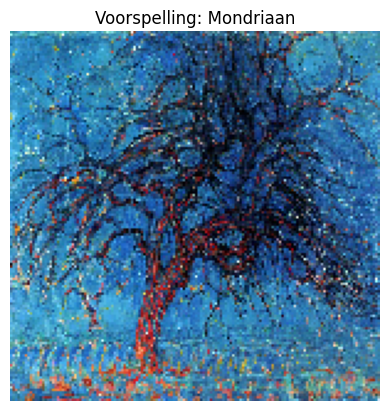

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Laad het beste model
model = load_model('/content/final_best_model.keras')

# Klasse-labels
class_labels = ['Mondriaan', 'Picasso', 'Rembrandt', 'Rubens']

# Upload een afbeelding
uploaded = files.upload()

for fn in uploaded.keys():

    img_path = fn
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Voorspelling
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    # Toon resultaat
    print(f"De schilder is waarschijnlijk: {predicted_class}")
    plt.imshow(img)
    plt.title(f"Voorspelling: {predicted_class}")
    plt.axis('off')
    plt.show()


# **Demo met Gradio**

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


model = load_model('/content/final_best_model.keras')


class_labels = {0: 'Mondriaan', 1: 'Picasso', 2: 'Rembrandt', 3: 'Rubens'}

# Functie om voorspellingen te maken
def predict_painter(img):
    img = img.resize((150, 150))  # Verklein afbeelding naar de verwachte inputgrootte
    img_array = np.array(img) / 255.0  # Normaliseer pixelwaarden
    img_array = np.expand_dims(img_array, axis=0)  # Voeg batch-dimensie toe
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return class_labels[predicted_class]

# Gradio-interface
demo = gr.Interface(
    fn=predict_painter,
    inputs=gr.Image(type="pil"),
    outputs="label",
    title="Kunstschilder Voorspeller",
    description="Upload een schilderij en ontdek welke schilder het heeft gemaakt!"
)


demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6827aab8ce55c4e3cf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
